In [1]:
# Copyright (c) 2020 ETH Zurich, Xiaying Wang, Michael Hersche, Batuhan Toemekce, 
# Burak Kaya, Michele Magno, and Luca Benini

In [2]:
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
import numpy as np
import os

## Plot Training and Validation Accuracy for Global Model

In [3]:
# plot global model results 
def plot_global(path,num_classes,n_ds,n_ch,T,plot_avg=True,plot_folds=True,color='black'):
    
    
    all_acc = np.zeros((5,4,100))
    for split_ctr in range(5):
        file = '{:}/stats/global_class_{:}_ds{:}_nch{:}_T{}_split_{:}.csv'.format(path,num_classes,n_ds,n_ch,T,split_ctr)
        all_acc[split_ctr] = np.genfromtxt(file, delimiter=' ').transpose()
    
    epochs = np.arange(100)
    if plot_folds: 
        handles = plt.plot(epochs, [[a*100 for a in b] for b in all_acc[:,0].transpose()], ':')
        plt.gca().set_prop_cycle(None)
        handles = plt.plot(epochs, [[a*100 for a in b] for b in all_acc[:,1].transpose()], '-')
    
    if plot_avg:
        plt.plot(epochs,100*all_acc[:,0].mean(axis=0),linestyle = ':',linewidth=3,color=color,label = 'Train {:}'.format(n_ch))
        plt.plot(epochs,100*all_acc[:,1].mean(axis=0),linestyle = '-',linewidth=3,color=color, label = 'Val {:}'.format(n_ch))
    
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy [%]")
    
    # print avg accuracy
    print("Global Model {:}-class MI, {:} channels: Train:\t{:.2f}% Val:\t{:.2f}%".format(
        num_classes,n_ch,100*all_acc[:,0,-1].mean(),100*all_acc[:,1,-1].mean()))
    
    return 100*all_acc[:,1,-1].mean()
        

Global Model 3-class MI, 2 channels: Train:	60.99% Val:	60.12%
Global Model 3-class MI, 3 channels: Train:	62.74% Val:	61.42%
Global Model 3-class MI, 5 channels: Train:	65.44% Val:	63.60%
Global Model 3-class MI, 7 channels: Train:	66.30% Val:	64.35%
Global Model 3-class MI, 9 channels: Train:	69.00% Val:	66.62%
Global Model 3-class MI, 11 channels: Train:	71.41% Val:	68.87%
Global Model 3-class MI, 64 channels: Train:	80.93% Val:	74.88%


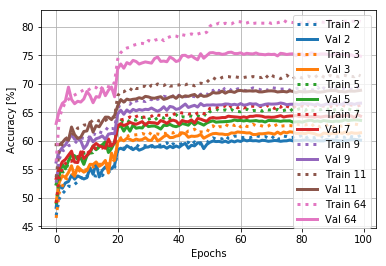

In [4]:
# center electrode band (C)
experiment_name = 'headphone_eeg'
result_path = '../results/'+experiment_name
n_ds = 1
n_ch = 64
T = 3
num_classes = 3

nch_list_center = np.array([2,3,5,7,9,11,64])
nch_len = nch_list_center.shape[0]
acc_gl_center = np.zeros(nch_len)

for ch_idx in range(nch_len): 
    acc_gl_center[ch_idx]= plot_global(result_path,num_classes,n_ds,nch_list_center[ch_idx],T,
                                       plot_avg=True,plot_folds=False,color='C'+str(ch_idx))
    
plt.grid()

Global Model 3-class MI, 4 channels: Train:	64.84% Val:	62.99%
Global Model 3-class MI, 6 channels: Train:	66.38% Val:	64.55%
Global Model 3-class MI, 10 channels: Train:	69.89% Val:	66.97%
Global Model 3-class MI, 14 channels: Train:	70.63% Val:	67.57%
Global Model 3-class MI, 18 channels: Train:	73.54% Val:	69.69%
Global Model 3-class MI, 20 channels: Train:	74.43% Val:	70.75%


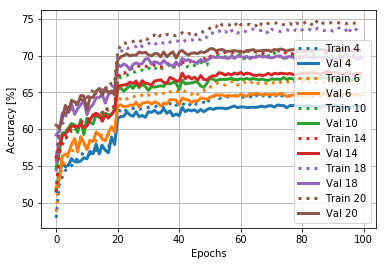

In [5]:
# center and front (C and FC)
experiment_name = 'headphone_eeg'
result_path = '../results/'+experiment_name
n_ds = 1
n_ch = 64
T = 3
num_classes = 3

nch_list_front = np.array([4,6,10,14,18,20])
nch_len = nch_list_front.shape[0]
acc_gl_front = np.zeros(nch_len)

for ch_idx in range(nch_len): 
    acc_gl_front[ch_idx]=plot_global(result_path,num_classes,n_ds,nch_list_front[ch_idx],T,
                                     plot_avg=True,plot_folds=False,color='C'+str(ch_idx))
    
plt.grid()

Global Model 3-class MI, 4 channels: Train:	63.24% Val:	61.44%
Global Model 3-class MI, 6 channels: Train:	64.79% Val:	62.74%
Global Model 3-class MI, 10 channels: Train:	68.15% Val:	65.37%
Global Model 3-class MI, 14 channels: Train:	68.91% Val:	65.97%
Global Model 3-class MI, 18 channels: Train:	71.67% Val:	68.30%
Global Model 3-class MI, 20 channels: Train:	73.38% Val:	69.71%


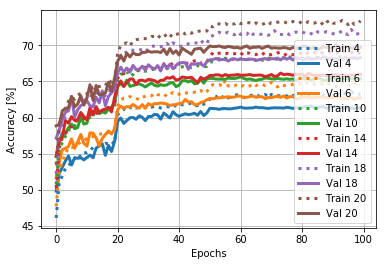

In [6]:
# center and back (C and CP)
experiment_name = 'headphone_eeg_CProw'
result_path = '../results/'+experiment_name
n_ds = 1
n_ch = 64
T = 3
num_classes = 3

nch_list_back = np.array([4,6,10,14,18,20])
nch_len = nch_list_back.shape[0]
acc_gl_back = np.zeros(nch_len)

for ch_idx in range(nch_len): 
    acc_gl_back[ch_idx] = plot_global(result_path,num_classes,n_ds,nch_list_back[ch_idx],
                                      T,plot_avg=True,plot_folds=False,color='C'+str(ch_idx))
    
plt.grid()

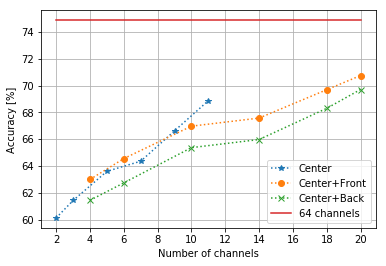

In [7]:
# plot all lines 

plt.plot(nch_list_center[:-1],acc_gl_center[:-1], '*:', label="Center")
plt.plot(nch_list_front,acc_gl_front, 'o:', label="Center+Front")
plt.plot(nch_list_back, acc_gl_back, 'x:', label="Center+Back")
plt.plot([2,20],[acc_gl_center[-1],acc_gl_center[-1]], label="64 channels")
plt.ylabel("Accuracy [%]")
plt.xlabel("Number of channels")
plt.grid()
plt.xticks(np.arange(2,22,2))
plt.legend()

## Compute Accuracy for Subject-specific Transfer Learning

In [13]:
# plot global model results 
def plot_ss(path,num_classes,n_ds,n_ch,T,color='black'):
    
    all_subjects = range(1,110)
    excluded_subjects=[88,92,100,104]
    subjects = [x for x in all_subjects if (x not in excluded_subjects)]
    n_sub = len(subjects)
    n_epoch = 10
    n_fold = 4
    n_res = 4 # both validation and training accuracy and loss
    all_acc = np.zeros((n_sub,n_fold,n_res,n_epoch+1)) 
    
    for sub_idx in range(n_sub):
        sub_number = subjects[sub_idx]
        for split_ctr in range(4): 
            file = '{:}/stats/ss_class_{:}_ds{:}_nch{:}_T{:}_sub{:03d}_split_{:}.csv'.format(
                path,num_classes,n_ds,n_ch,T,sub_number,split_ctr)
            all_acc[sub_idx,split_ctr] = np.genfromtxt(file, delimiter=' ').transpose()
            #np.savetxt(file, all_acc[sub_idx,split_ctr])
    
    global_acc = 100*all_acc[:,1,1,0].mean()
    ss_acc = 100*all_acc[:,1,1,-1].mean()

    print("Global Model {:}-class MI, {:} channels: Global:\t{:.2f} SS:\t{:.2f}% Increase:\t{:.2f}%".format(
        num_classes,n_ch,global_acc,ss_acc,ss_acc-global_acc))
    # plot training curve 
    epochs = np.arange(n_epoch+1)
    
    plt.plot(epochs,100*all_acc[:,:,0].mean(axis=(0,1)),linestyle = ':',linewidth=3,color=color,label = 'Train {:}'.format(n_ch))
    plt.plot(epochs,100*all_acc[:,:,1].mean(axis=(0,1)),linestyle = '-',linewidth=3,color =color,label = 'Val {:}'.format(n_ch))
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy [%]")
    
    return ss_acc
    
    

Global Model 3-class MI, 2 channels: Global:	62.08 SS:	65.18% Increase:	3.10%
Global Model 3-class MI, 3 channels: Global:	62.92 SS:	66.01% Increase:	3.10%
Global Model 3-class MI, 5 channels: Global:	65.54 SS:	68.81% Increase:	3.27%
Global Model 3-class MI, 7 channels: Global:	65.65 SS:	70.60% Increase:	4.94%
Global Model 3-class MI, 9 channels: Global:	66.79 SS:	71.79% Increase:	5.00%
Global Model 3-class MI, 11 channels: Global:	70.00 SS:	73.87% Increase:	3.87%
Global Model 3-class MI, 64 channels: Global:	76.67 SS:	80.95% Increase:	4.29%


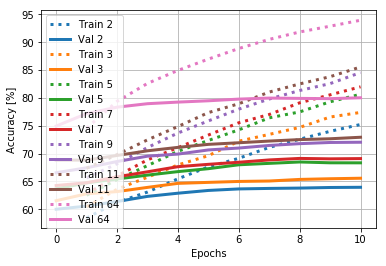

In [14]:
# just center (C)
experiment_name = 'ss_headphone_eeg'
result_path = '../results/'+experiment_name
n_ds = 1
T = 3
num_classes = 3

nch_list_center = np.array([2,3,5,7,9,11,64])
nch_len = nch_list_center.shape[0]
acc_ss_center = np.zeros(nch_len)

for ch_idx in range(nch_len): 
    acc_ss_center[ch_idx]= plot_ss(result_path,num_classes,n_ds,nch_list_center[ch_idx],T,
                                       color='C'+str(ch_idx))
    
plt.grid()

Global Model 3-class MI, 4 channels: Global:	64.17 SS:	68.33% Increase:	4.17%
Global Model 3-class MI, 6 channels: Global:	65.77 SS:	70.12% Increase:	4.35%
Global Model 3-class MI, 10 channels: Global:	67.38 SS:	72.56% Increase:	5.18%
Global Model 3-class MI, 14 channels: Global:	67.86 SS:	73.93% Increase:	6.07%
Global Model 3-class MI, 18 channels: Global:	70.42 SS:	76.85% Increase:	6.43%
Global Model 3-class MI, 20 channels: Global:	71.55 SS:	77.44% Increase:	5.89%


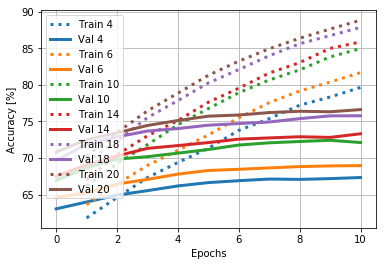

In [15]:
# Center and Front (C and FC)
experiment_name = 'ss_headphone_eeg'
result_path = '../results/'+experiment_name
n_ds = 1
T = 3
num_classes = 3

nch_list_front = np.array([4,6,10,14,18,20])
nch_len = nch_list_front.shape[0]
acc_ss_front = np.zeros(nch_len)

for ch_idx in range(nch_len): 
    acc_ss_front[ch_idx]=plot_ss(result_path,num_classes,n_ds,nch_list_front[ch_idx],T,
                                       color='C'+str(ch_idx))
    
plt.grid()

Global Model 3-class MI, 4 channels: Global:	62.98 SS:	66.43% Increase:	3.45%
Global Model 3-class MI, 6 channels: Global:	64.46 SS:	68.27% Increase:	3.81%
Global Model 3-class MI, 10 channels: Global:	66.61 SS:	71.13% Increase:	4.52%
Global Model 3-class MI, 14 channels: Global:	67.80 SS:	71.55% Increase:	3.75%
Global Model 3-class MI, 18 channels: Global:	69.05 SS:	75.18% Increase:	6.13%
Global Model 3-class MI, 20 channels: Global:	69.88 SS:	75.00% Increase:	5.12%


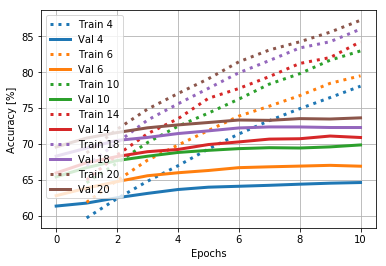

In [16]:
# center and back (C and CP)
experiment_name = 'ss_headphone_eeg_CProw'
result_path = '../results/'+experiment_name
n_ds = 1
n_ch = 64
T = 3
num_classes = 3

nch_list_back = np.array([4,6,10,14,18,20])
nch_len = nch_list_back.shape[0]
acc_ss_back = np.zeros(nch_len)

for ch_idx in range(nch_len): 
    acc_ss_back[ch_idx] = plot_ss(result_path,num_classes,n_ds,nch_list_back[ch_idx],
                                      T,color='C'+str(ch_idx))
    
plt.grid()

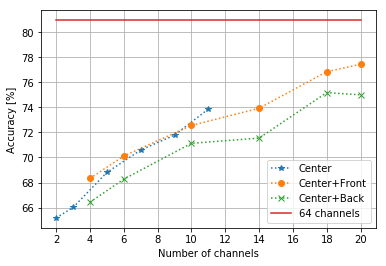

In [17]:
# plot all lines 

plt.plot(nch_list_center[:-1],acc_ss_center[:-1], '*:', label="Center")
plt.plot(nch_list_front,acc_ss_front, 'o:', label="Center+Front")
plt.plot(nch_list_back, acc_ss_back, 'x:', label="Center+Back")
plt.plot([2,20],[acc_ss_center[-1],acc_ss_center[-1]], label="64 channels")
plt.ylabel("Accuracy [%]")
plt.xlabel("Number of channels")
plt.grid()
plt.xticks(np.arange(2,22,2))
plt.legend()